In [ ]:
# Importação das bibliotecas que serão utilizadas

!pip install basedosdados
import pandas as pd
import basedosdados as bd
import matplotlib.pyplot as plt
import seaborn as sns

### Importando e tratando os dados de IPS

In [3]:
# Carregando os dados de componentes do IPS do município do Rio de Janeiro
ips_bd = bd.read_table(dataset_id='br_rj_rio_de_janeiro_ipp_ips',
                       table_id='dimensoes_componentes',
                       billing_project_id="analytica-ps")

# Retirando os dados que não são referentes às regiões administrativas do município
ips_ra = ips_bd.loc[ips_bd['regiao_administrativa'] != 'Rio De Janeiro']
ips_ra.head(10)

Downloading: 100%|██████████| 99/99 [00:00<00:00, 418.23rows/s]


,ano,regiao_administrativa,ips_geral,necessidades_humanas_basicas_nota_dimensao,nutricao_cuidados_medicos_basicos,agua_saneamento,moradia,seguranca_pessoal,fundamentos_bem_estar_nota_dimensao,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,oportunidades_nota_dimensao,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
1,2016,Portuaria,45.33,59.10,87.63,80.80,67.97,0.00,41.67,41.34,20.73,64.74,39.89,35.23,39.35,61.94,34.18,5.43
2,2016,Centro,57.75,62.43,59.38,74.18,91.85,24.31,52.41,55.60,56.00,41.04,56.99,58.42,45.89,87.27,52.24,48.26
3,2016,Rio Comprido,52.43,58.97,61.22,84.36,64.78,25.52,47.19,34.00,42.08,47.84,64.84,51.14,66.89,50.45,64.74,22.48
4,2016,Botafogo,87.12,93.32,85.15,98.49,99.55,90.08,81.13,78.47,86.52,81.46,78.07,86.91,68.19,85.74,94.30,99.39
5,2016,Copacabana,82.93,94.58,86.04,99.32,96.54,96.42,78.09,80.93,81.95,72.39,77.10,76.13,64.65,71.18,85.16,83.53
6,2016,Lagoa,84.94,91.71,79.24,98.86,96.71,92.02,82.97,62.49,89.06,84.58,95.74,80.15,54.77,86.21,98.04,81.59
7,2016,São Cristovão,50.72,67.85,70.05,86.36,67.64,47.34,42.29,44.50,34.65,31.45,58.57,42.02,64.15,40.63,46.46,16.83
8,2016,Tijuca,78.13,87.86,82.48,84.62,95.15,89.18,67.13,56.82,80.32,77.75,53.63,79.39,71.18,78.81,88.76,78.82
9,2016,Vila Isabel,74.12,85.18,72.45,94.21,86.67,87.40,67.28,63.06,74.99,74.41,56.67,69.88,58.40,61.45,86.49,73.20
10,2016,Ramos,57.91,72.14,54.91,94.92,68.66,70.06,46.73,47.17,52.42,39.40,47.94,54.86,81.56,48.68,64.82,24.39


### Explorando os dados de IPS


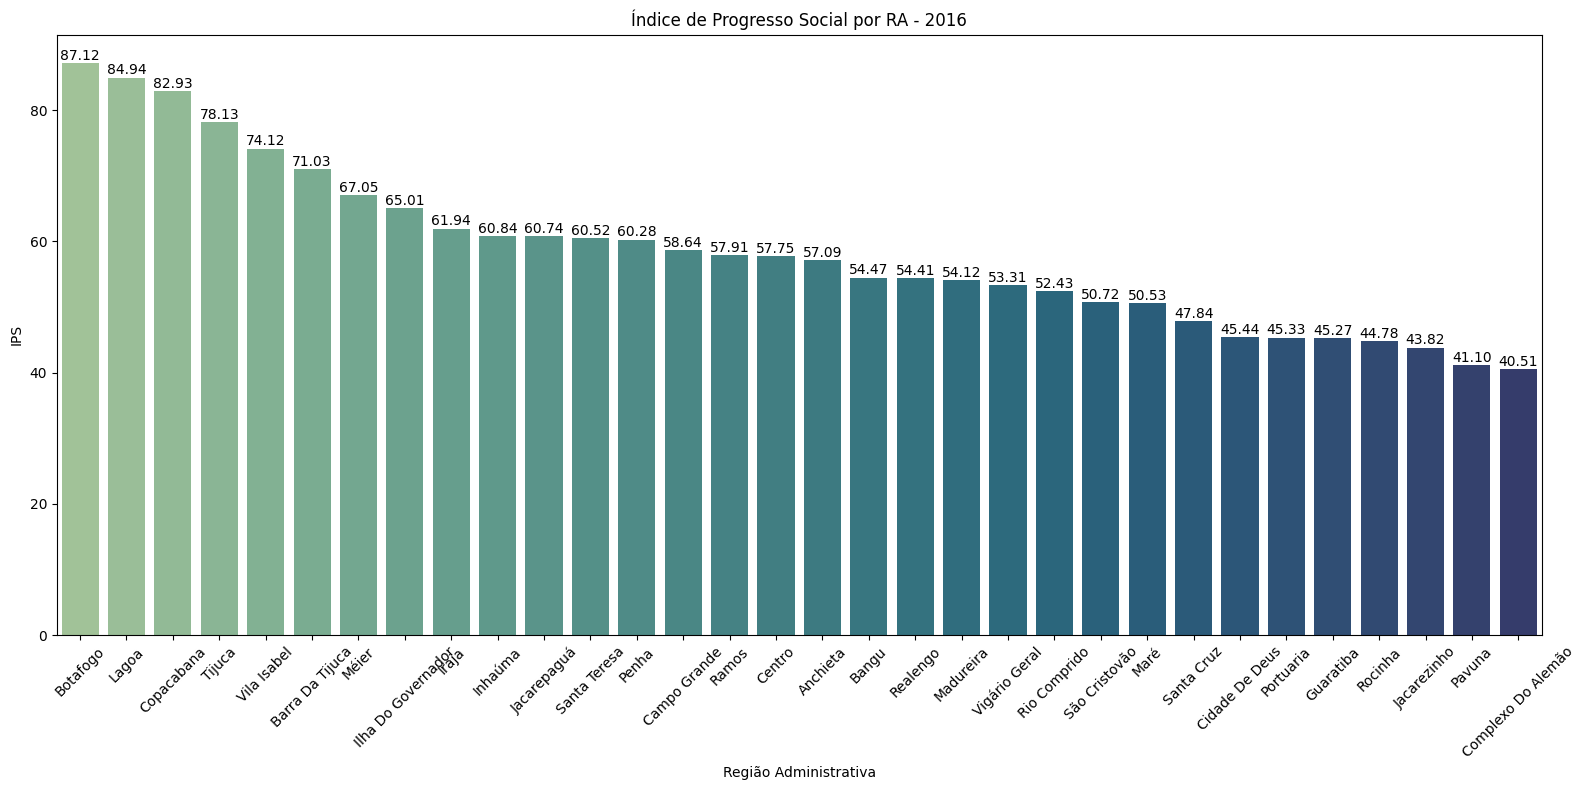

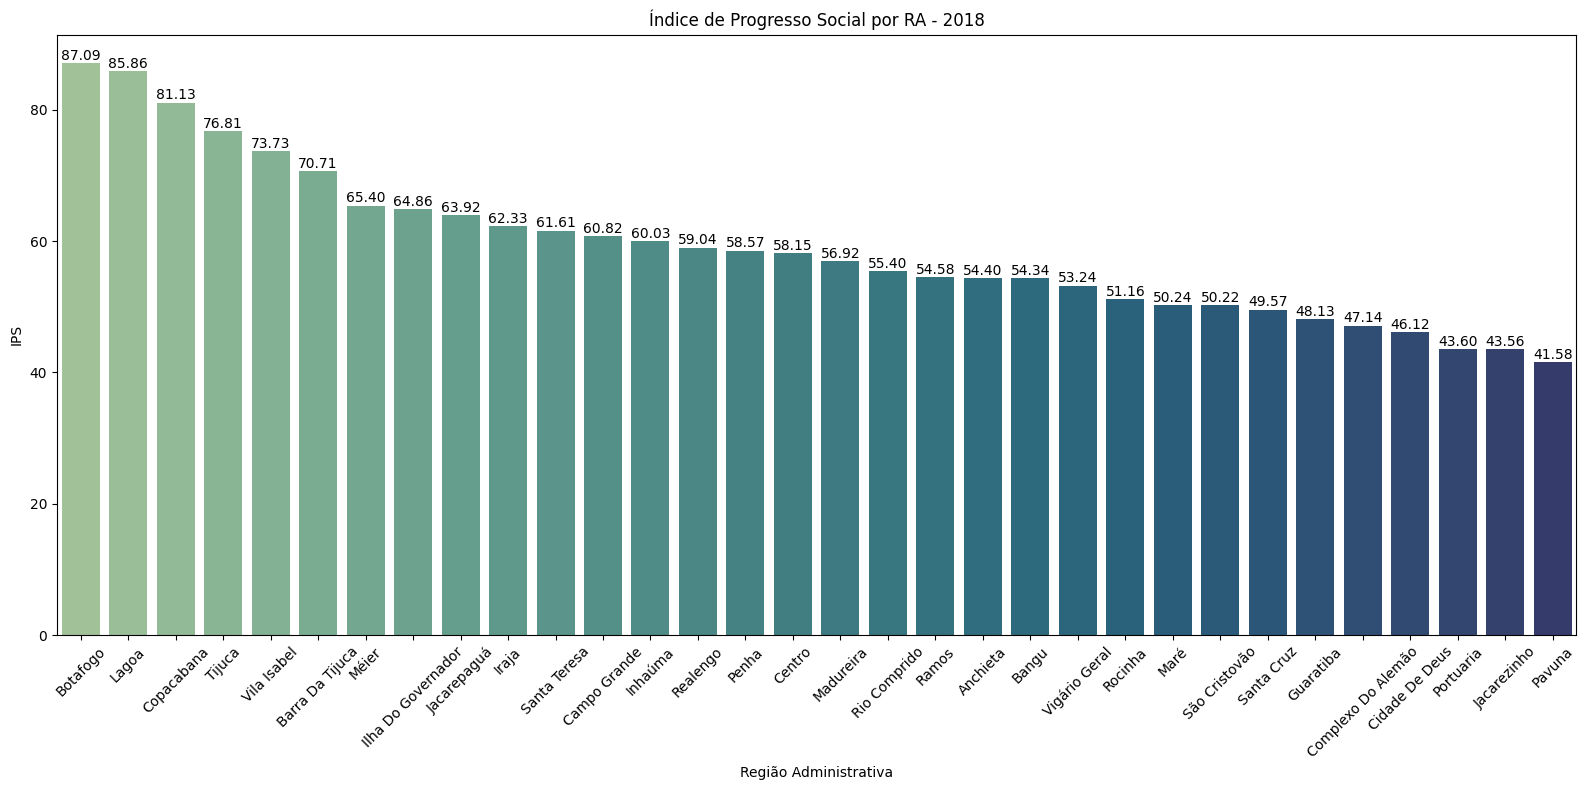

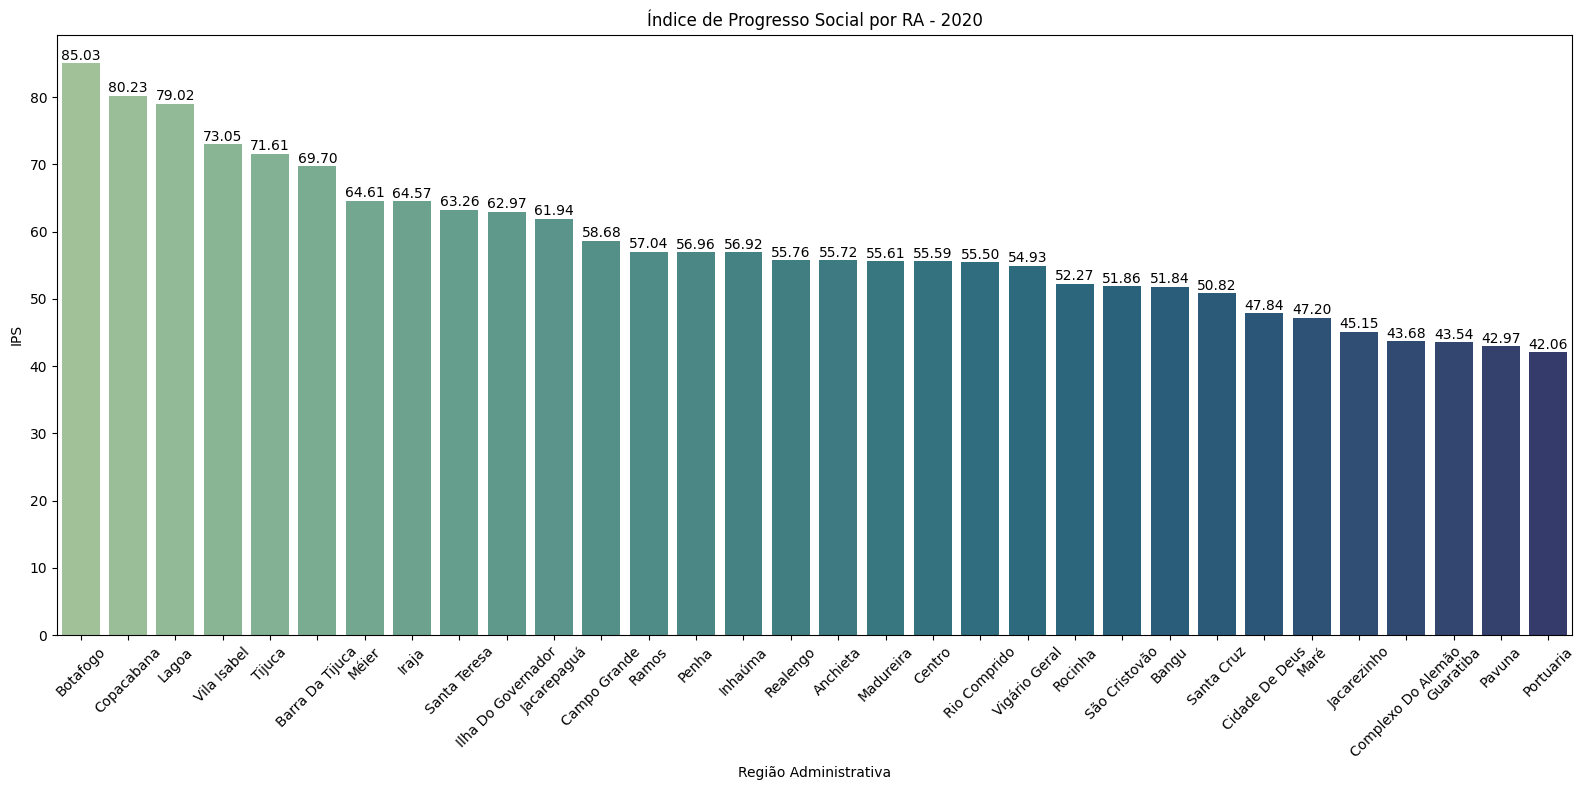

In [4]:
# Criação de gráficos afim de comparar as regiões administrativas (RAs) para cada ano de análise
years = [2016, 2018, 2020]
data_filtered = ips_ra[ips_ra['ano'].isin(years)]

# Ordenando os dados pelo valor de IPS geral
data_sorted = data_filtered.sort_values(by='ips_geral', ascending=False)

# Para cada ano será gerado um gráfico diferente
for year in years:
  plt.figure(figsize=(16, 8))
  data_year = data_sorted[data_sorted['ano'] == year]

  # Criação de um gráfico de barras contendo os valores desejados
  sns.barplot(data=data_year, x='regiao_administrativa', y='ips_geral', palette='crest')

  # Inserção do valor de IPS acima da barra para melhor visualização
  for i, value in enumerate(data_year['ips_geral']):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center')

  # Demais configurações dos gráficos
  plt.xlabel('Região Administrativa')
  plt.ylabel('IPS')
  plt.title(f'Índice de Progresso Social por RA - {year}')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

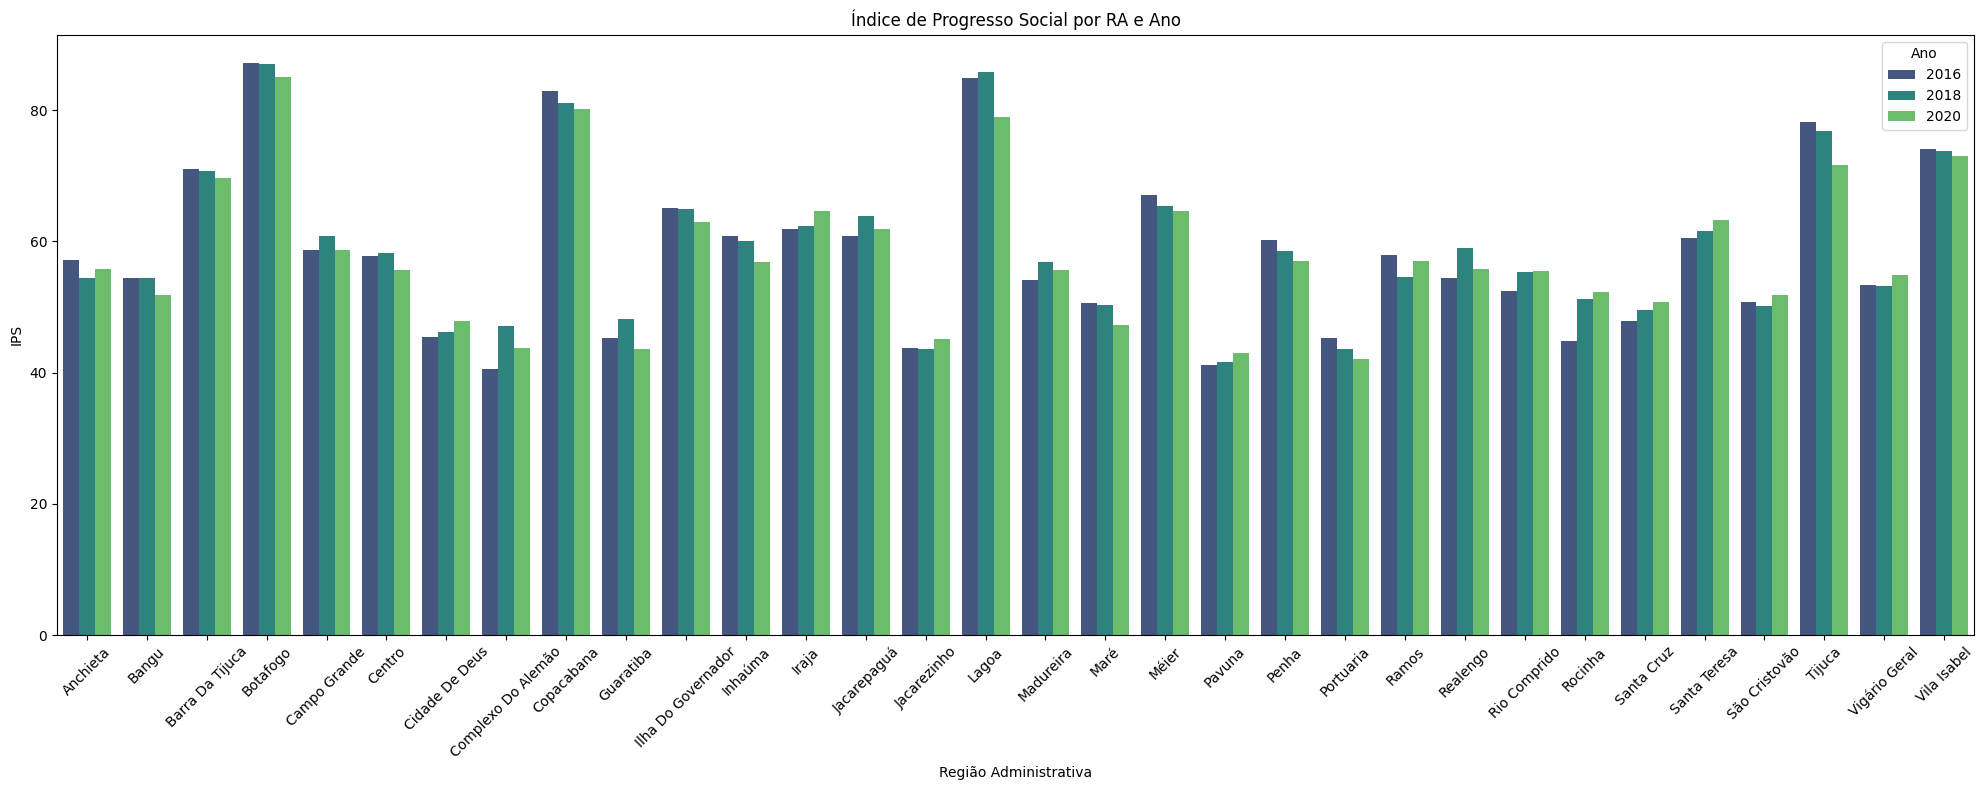

In [5]:
# Criação de um gráfico único que contenha os valores de IPS para cada RA em cada ano
data_sorted = ips_ra.sort_values(by=['regiao_administrativa', 'ano', 'ips_geral'],
                                 ascending=[True, True, False])

# Configurações referentes ao gráfico
plt.figure(figsize=(20, 8))
sns.barplot(data=data_sorted, x='regiao_administrativa', y='ips_geral',
            hue='ano', ci=None, palette='viridis')

plt.xlabel('Região Administrativa')
plt.ylabel('IPS')
plt.title('Índice de Progresso Social por RA e Ano')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()

plt.show()

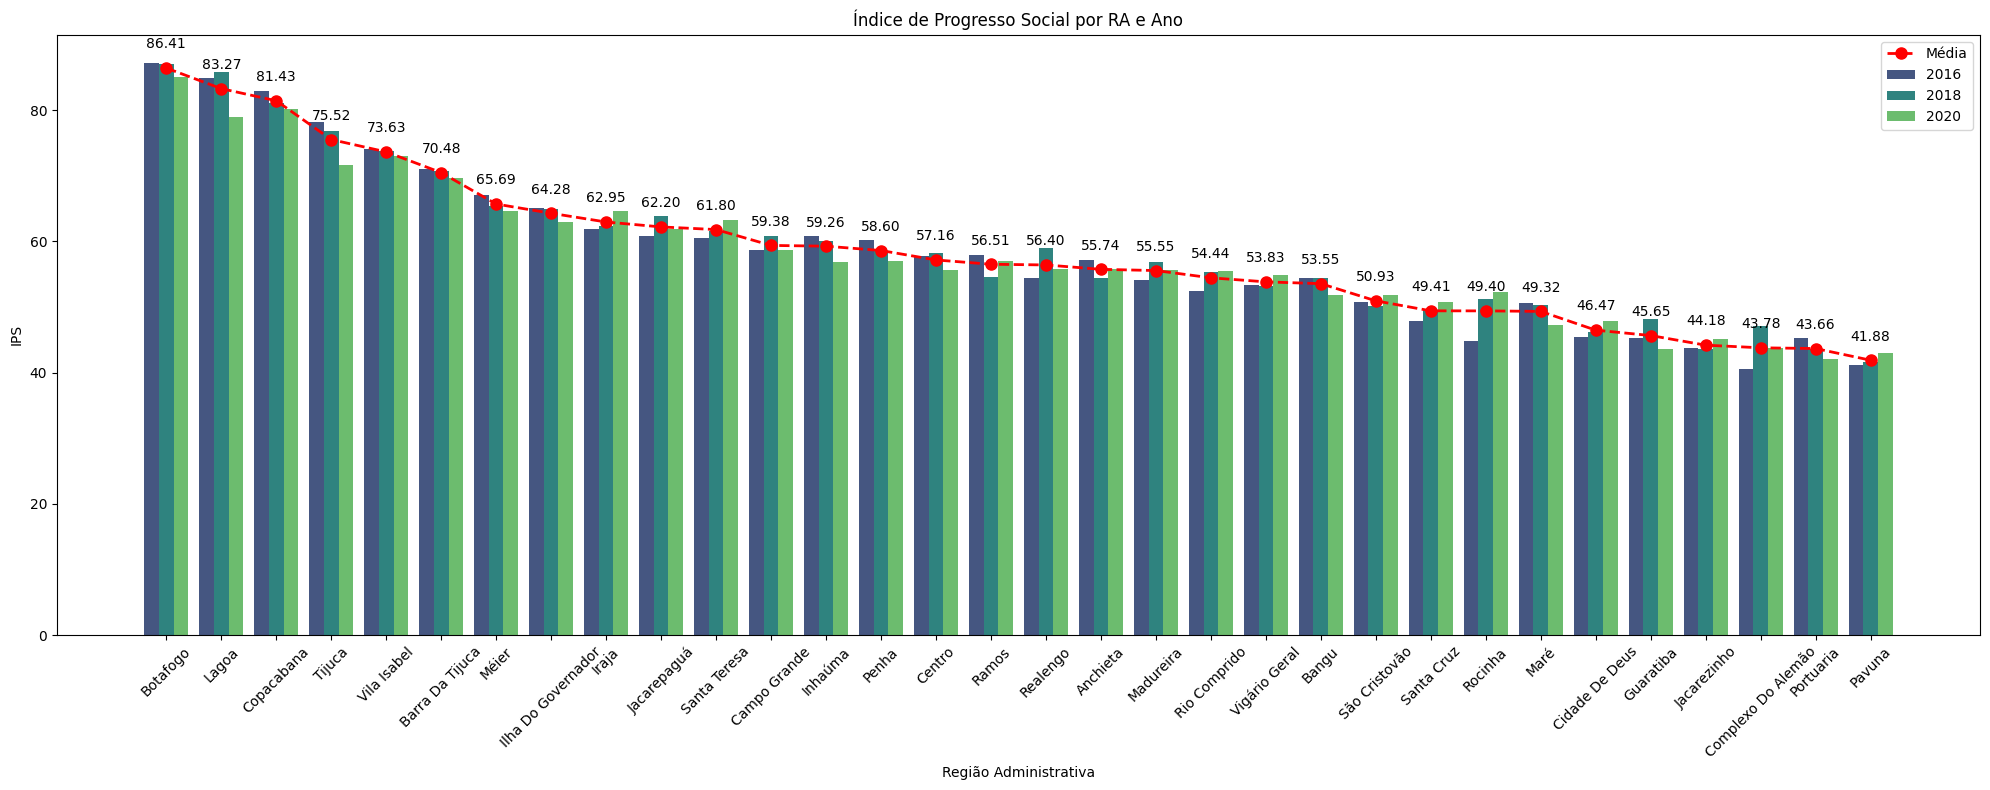

In [6]:
# A partir do gráfico criado, ordenamos ele com base no valor médio de IPS de cada RA nos anos de 2016, 2018 e 2020
mean_ips_by_region = ips_ra.groupby('regiao_administrativa')['ips_geral'].mean()

# Ordenando os dados com base na média calculada de cada RA
mean_ips_sorted = mean_ips_by_region.sort_values(ascending=False)
data_sorted = ips_ra.sort_values(by='regiao_administrativa',
                                 key=lambda x: x.map(mean_ips_by_region), ascending=False)

# Configurações para criação de um gráfico
plt.figure(figsize=(20, 8))

ax = sns.barplot(data=data_sorted, x='regiao_administrativa', y='ips_geral',
                 hue='ano', ci=None, palette='viridis')

plt.xlabel('Região Administrativa')
plt.ylabel('IPS')
plt.title('Índice de Progresso Social por RA e Ano')
plt.xticks(rotation=45)
plt.legend(title='Ano')

# Inserção de pontos no gráfico que indicarão o valor médio calculado para cada RA
x_positions = range(len(mean_ips_sorted))
plt.plot(x_positions, mean_ips_sorted.values, marker='o', color='red',
         linestyle='dashed', linewidth=2, markersize=8, label='Média')

# Adicionando os valores de média para cada ponto para que fique de forma legível
for i, value in enumerate(mean_ips_sorted):
  plt.text(i, value + 3, f'{value:.2f}', ha='center')

# Demais configurações do gráfico
plt.legend()

ax.set_xticks(x_positions)
ax.set_xticklabels(mean_ips_sorted.index)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

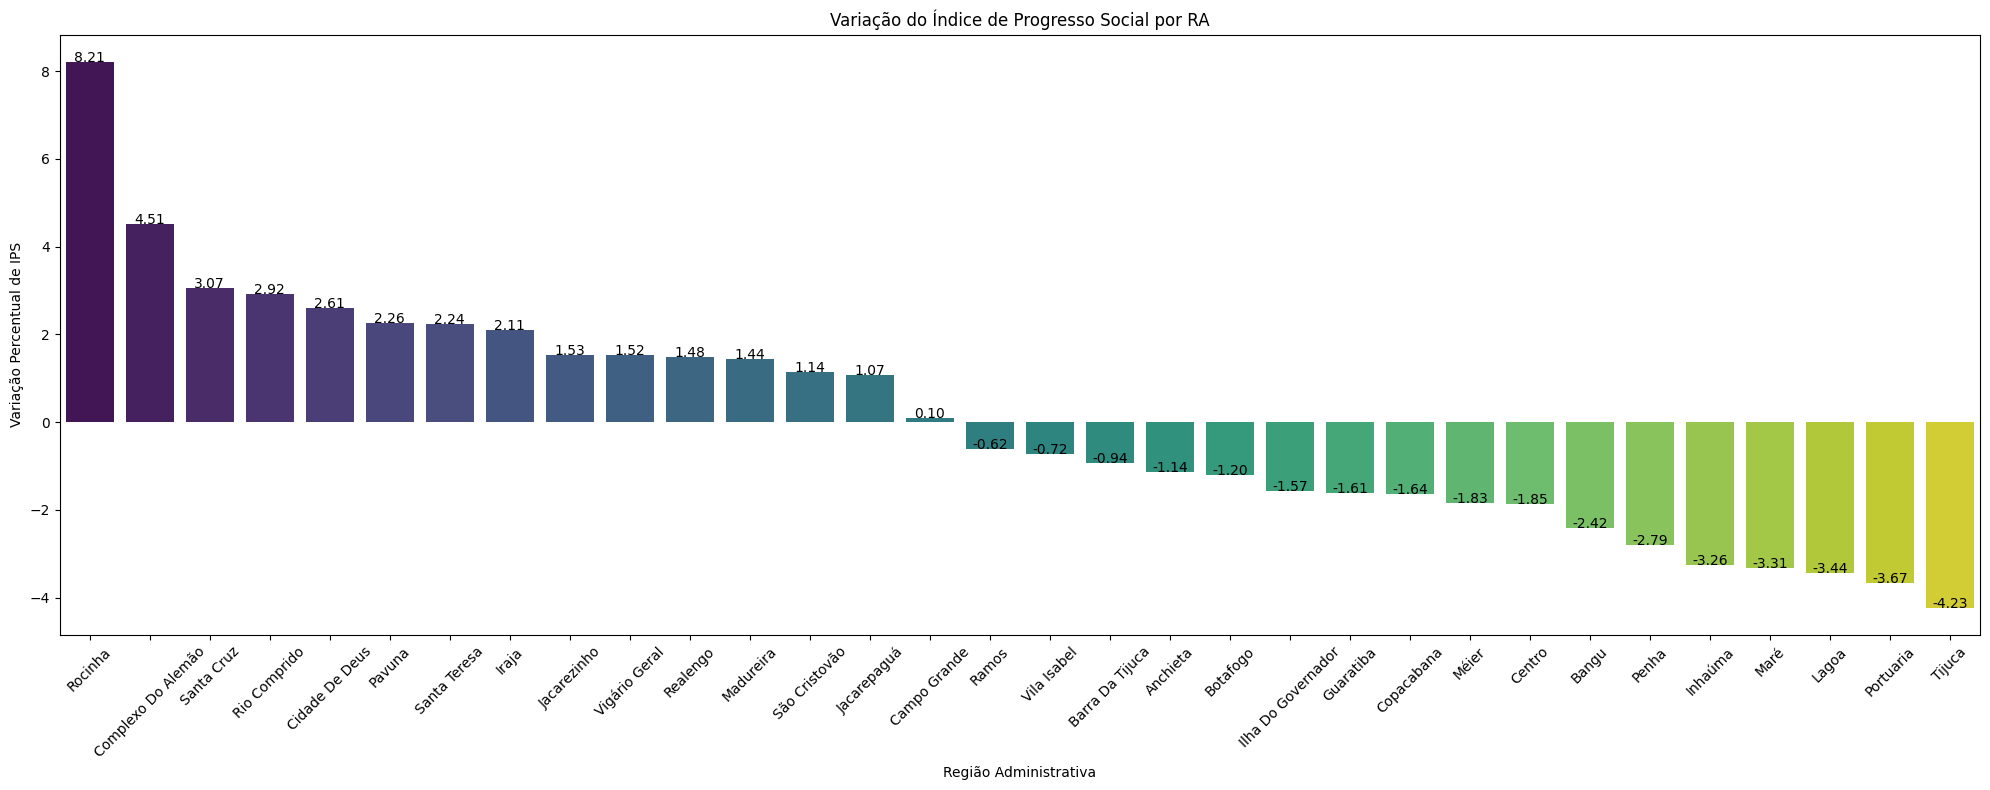

In [7]:
# Criação de um gráfico que represente a variação percentual de IPS durante os três anos de análise
years_of_interest = [2016, 2018, 2020]
data_filtered = ips_ra[ips_ra['ano'].isin(years_of_interest)]

# Pivotando a tabela para ter os anos como colunas
data_pivot = data_filtered.pivot(index='regiao_administrativa', columns='ano', values='ips_geral')

# Calculando a variação percentual entre pares de valores consecutivos para cada RA
data_pivot['variacao'] = ((((data_pivot[2018] - data_pivot[2016]) /
                            data_pivot[2016]) +
                             ((data_pivot[2020] - data_pivot[2018]) /
                              data_pivot[2018])) / 2) * 100

# Ordenando os dados pelo variação calculada
data_sorted = data_pivot.sort_values(by='variacao', ascending=False)

# Configuração do gráfico desejado com base nos cálculos feitos
plt.figure(figsize=(20, 8))

ax = sns.barplot(data=data_sorted, x=data_sorted.index, y='variacao', palette='viridis')

plt.xlabel('Região Administrativa')
plt.ylabel('Variação Percentual de IPS')
plt.title('Variação do Índice de Progresso Social por RA')
plt.xticks(rotation=45)

# Inserção dos dados de varição acima de cada barra para melhor visualização
for i, value in enumerate(data_sorted['variacao']):
  plt.text(i, value, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()

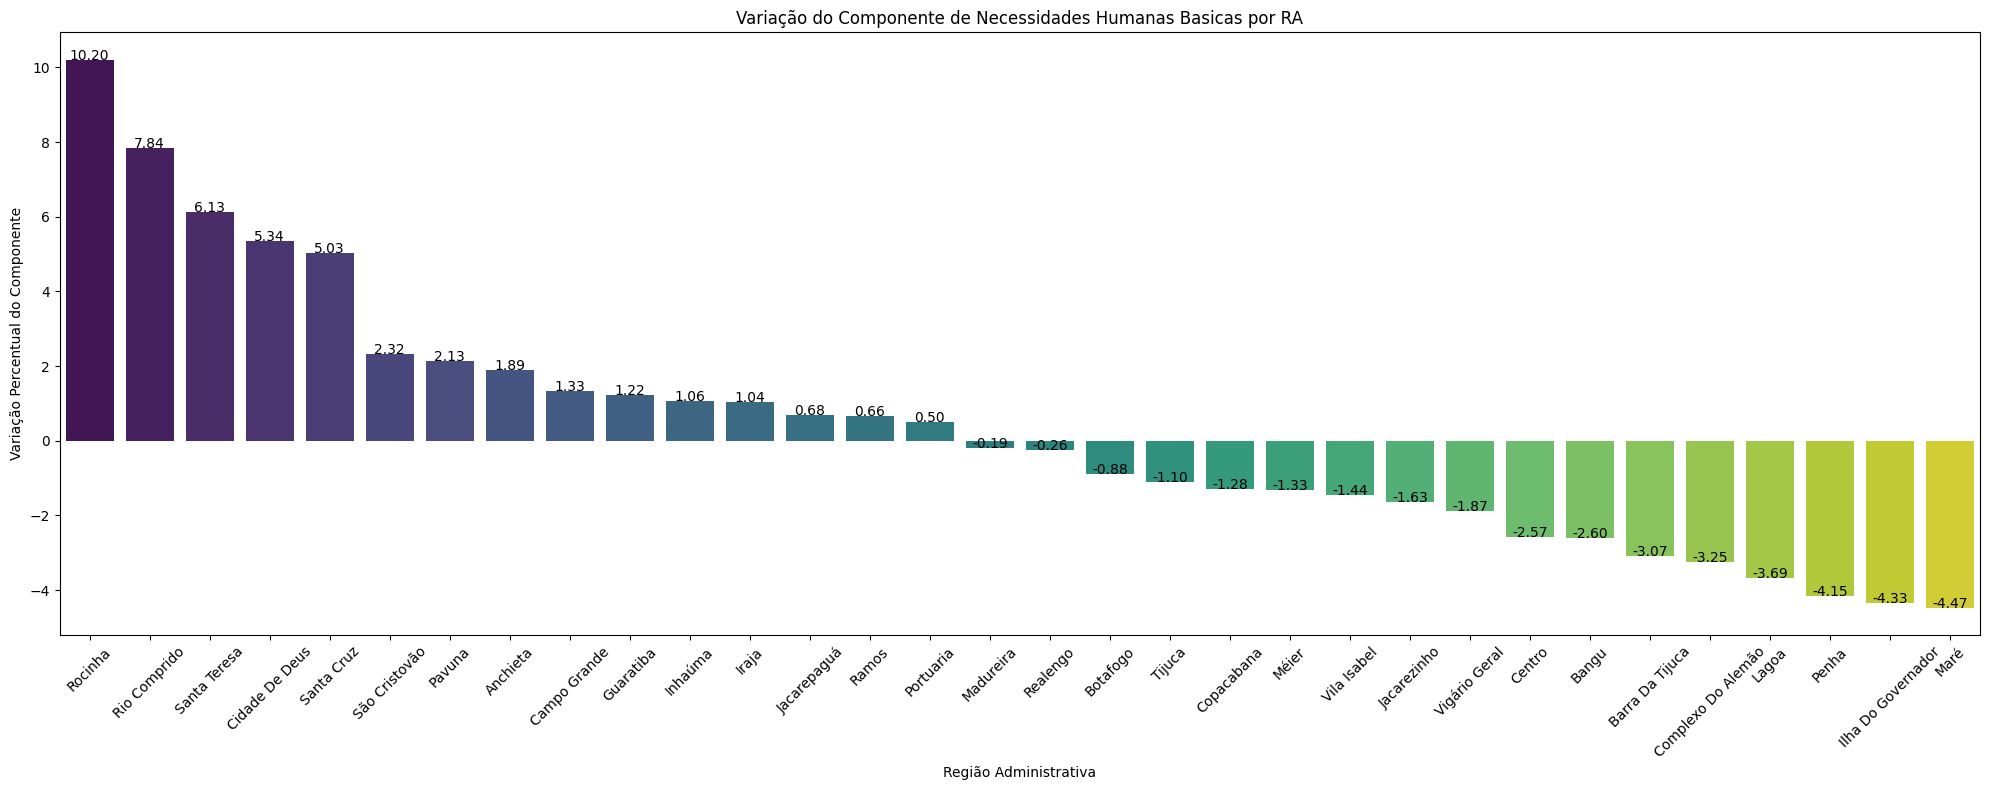

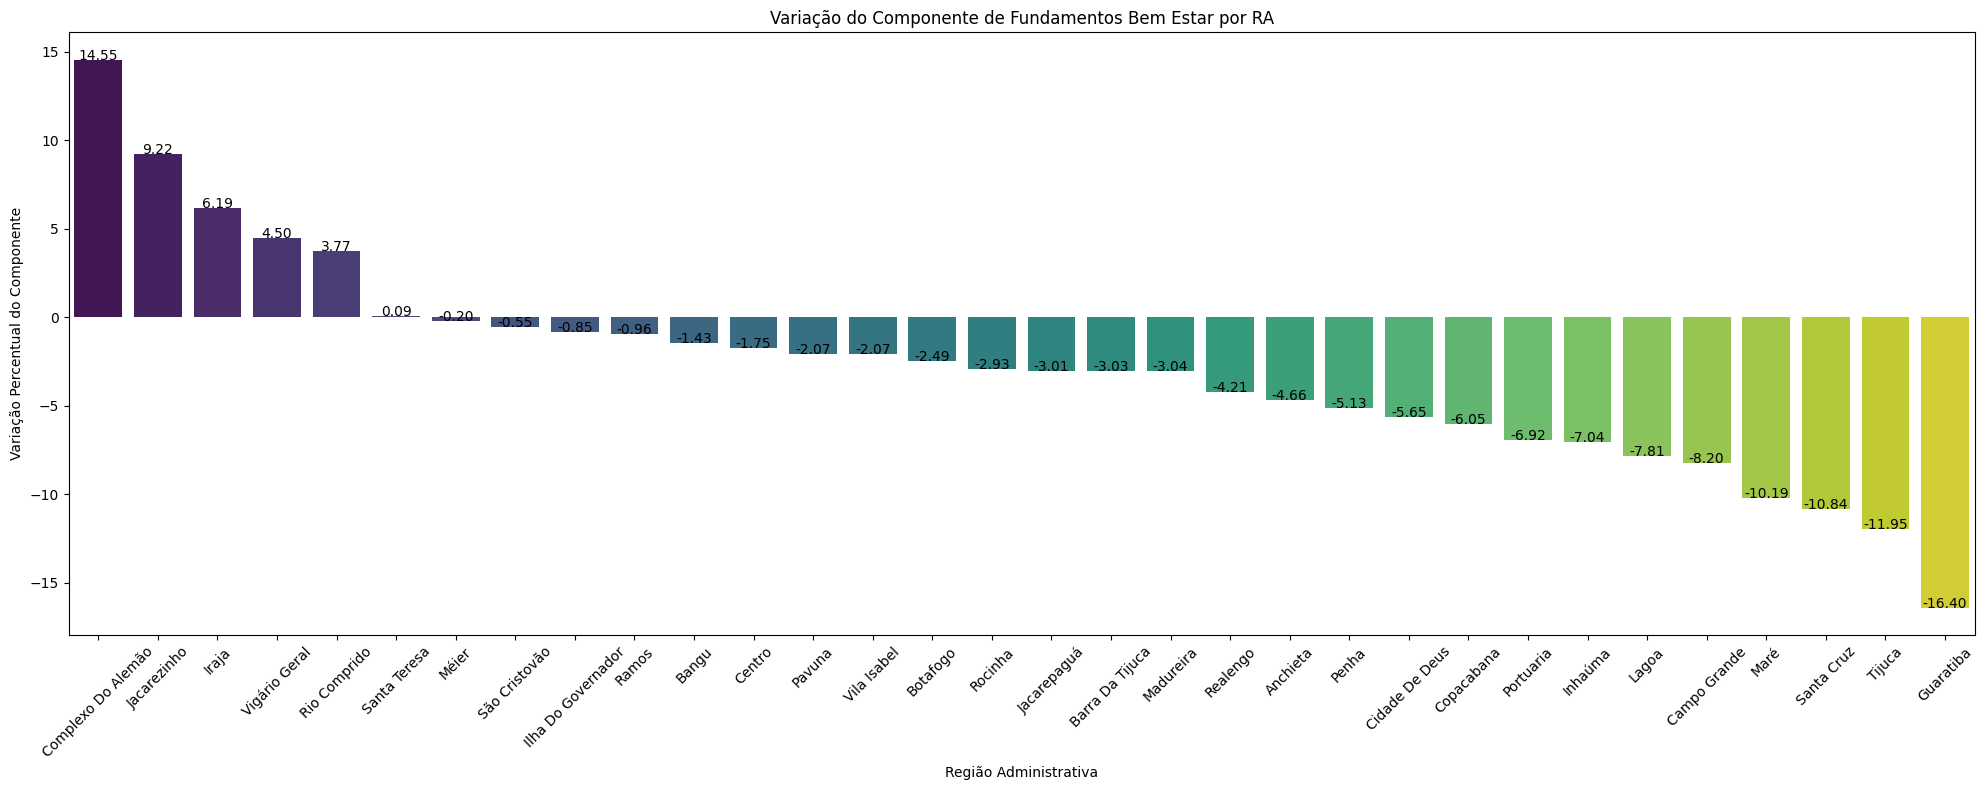

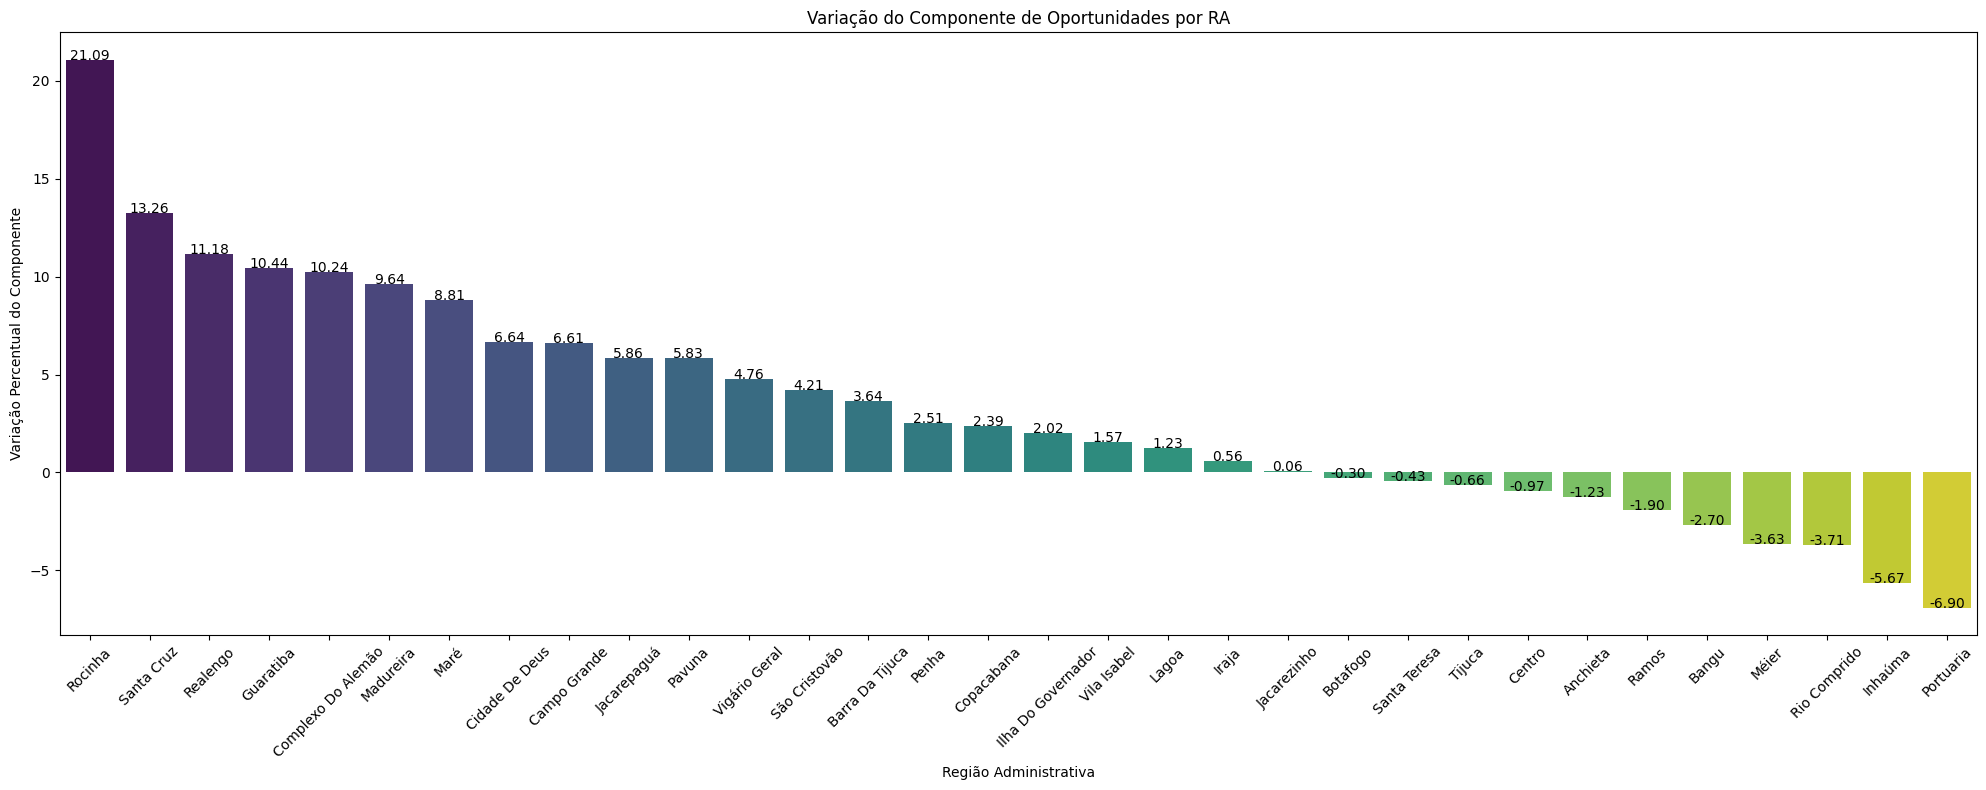

In [8]:
# Mesma ideia que o gráfico anterior aplicado para os três componentes do IPS
years_of_interest = [2016, 2018, 2020]
data_filtered = ips_ra[ips_ra['ano'].isin(years_of_interest)]

# Definição dos componentes do IPS e as colunas onde estão os dados no dataset
components = ['necessidades_humanas_basicas_nota_dimensao',
              'fundamentos_bem_estar_nota_dimensao',
              'oportunidades_nota_dimensao']

# Iteração para criação dos diferentes gráficos para cada componente
for component in components:
  data_pivot = data_filtered.pivot(index='regiao_administrativa', columns='ano', values=component)
  data_pivot['variacao'] = ((((data_pivot[2018] - data_pivot[2016]) /
                            data_pivot[2016]) +
                             ((data_pivot[2020] - data_pivot[2018]) /
                              data_pivot[2018])) / 2) * 100
  data_sorted = data_pivot.sort_values(by='variacao', ascending=False)
  plt.figure(figsize=(20, 8))

  ax = sns.barplot(data=data_sorted, x=data_sorted.index, y='variacao', palette='viridis')

  # Utilização de diferentes títulos para cada gráfico
  title = component.split("_")
  title = title[:-2]
  title = " ".join([part.capitalize() for part in title])

  plt.xlabel('Região Administrativa')
  plt.ylabel('Variação Percentual do Componente')
  plt.title(f'Variação do Componente de {title} por RA')
  plt.xticks(rotation=45)

  for i, value in enumerate(data_sorted['variacao']):
    plt.text(i, value, f'{value:.2f}', ha='center')

  plt.tight_layout()
  plt.show()

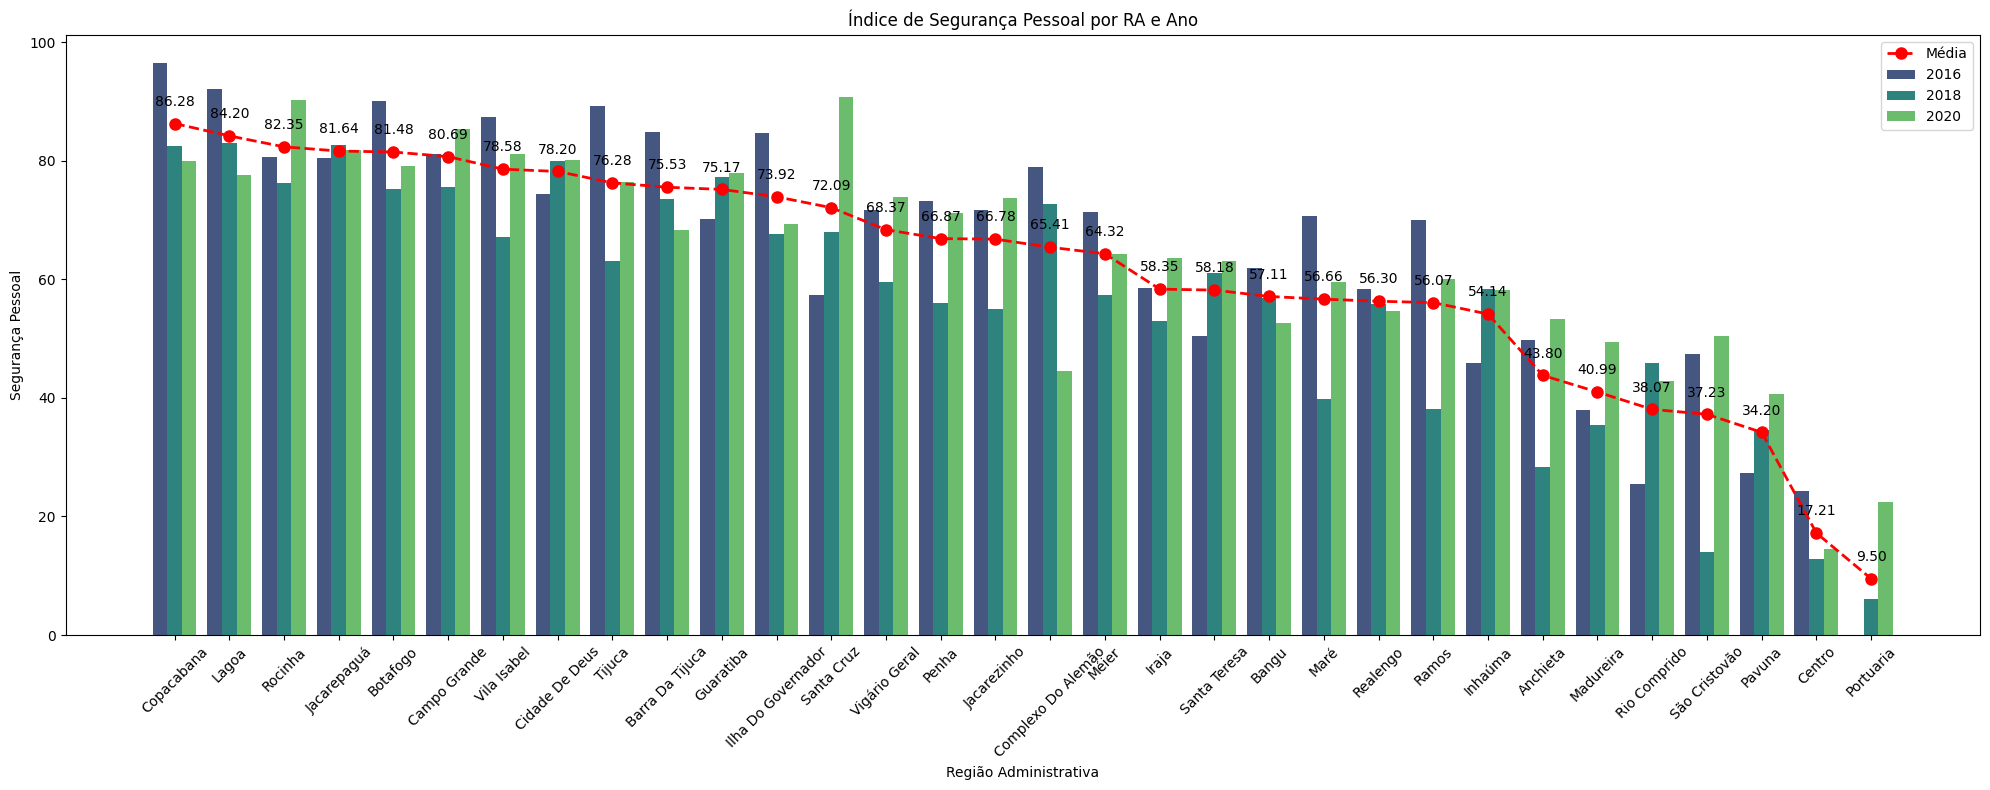

In [9]:
# Criação de um gráfico que evidencie a média do indicador de Segurança Pessoal no decorrer dos anos

mean_ips_by_region = ips_ra.groupby('regiao_administrativa')['seguranca_pessoal'].mean()

# Ordenando os dados com base na média calculada de cada RA
mean_ips_sorted = mean_ips_by_region.sort_values(ascending=False)
data_sorted = ips_ra.sort_values(by='regiao_administrativa',
                                 key=lambda x: x.map(mean_ips_by_region), ascending=False)

# Configurações para criação de um gráfico
plt.figure(figsize=(20, 8))

ax = sns.barplot(data=data_sorted, x='regiao_administrativa',
                 y='seguranca_pessoal', hue='ano', ci=None, palette='viridis')

plt.xlabel('Região Administrativa')
plt.ylabel('Segurança Pessoal')
plt.title('Índice de Segurança Pessoal por RA e Ano')
plt.xticks(rotation=45)
plt.legend(title='Ano')

# Inserção de pontos no gráfico que indicarão o valor médio calculado para cada RA
x_positions = range(len(mean_ips_sorted))
plt.plot(x_positions, mean_ips_sorted.values, marker='o', color='red',
         linestyle='dashed', linewidth=2, markersize=8, label='Média')

# Adicionando os valores de média para cada ponto para que fique de forma legível
for i, value in enumerate(mean_ips_sorted):
  plt.text(i, value + 3, f'{value:.2f}', ha='center')

# Demais configurações do gráfico
plt.legend()

ax.set_xticks(x_positions)
ax.set_xticklabels(mean_ips_sorted.index)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

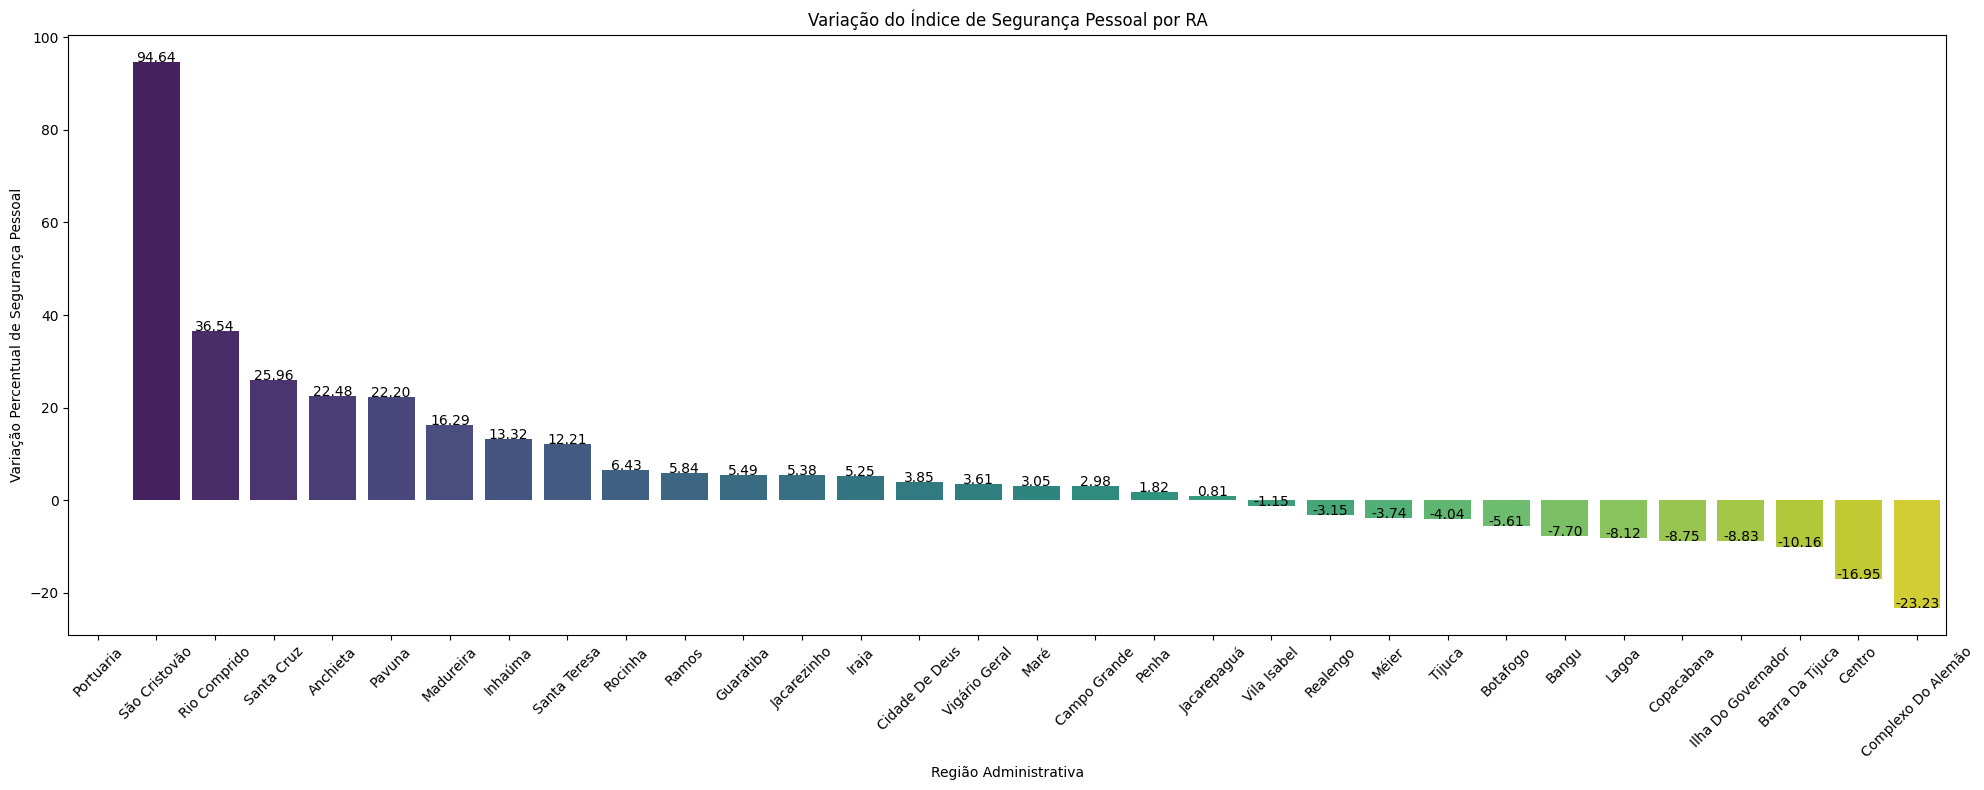

In [10]:
# Criação de um gráfico que represente a variação percentual de IPS durante os três anos de análise
years_of_interest = [2016, 2018, 2020]
data_filtered = ips_ra[ips_ra['ano'].isin(years_of_interest)]

# Pivotando a tabela para ter os anos como colunas
data_pivot = data_filtered.pivot(index='regiao_administrativa', columns='ano', values='seguranca_pessoal')

# Calculando a variação percentual entre pares de valores consecutivos para cada RA
data_pivot['variacao'] = ((((data_pivot[2018] - data_pivot[2016]) /
                            data_pivot[2016]) +
                             ((data_pivot[2020] - data_pivot[2018]) /
                              data_pivot[2018])) / 2) * 100

# Ordenando os dados pelo variação calculada
data_sorted = data_pivot.sort_values(by='variacao', ascending=False)

# Configuração do gráfico desejado com base nos cálculos feitos
plt.figure(figsize=(20, 8))

ax = sns.barplot(data=data_sorted, x=data_sorted.index, y='variacao', palette='viridis')

plt.xlabel('Região Administrativa')
plt.ylabel('Variação Percentual de Segurança Pessoal')
plt.title('Variação do Índice de Segurança Pessoal por RA')
plt.xticks(rotation=45)

# Inserção dos dados de varição acima de cada barra para melhor visualização
for i, value in enumerate(data_sorted['variacao']):
  plt.text(i, value, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()

### Importando indicador econômico e tratando

In [11]:
# Importando dados da quantidade de Estabelecimentos presentes em cada RA do município do RJ
estebelecimentos_2016 = pd.read_excel('/content/estabelecimentos.xls', sheet_name="2016")
estebelecimentos_2018 = pd.read_excel('/content/estabelecimentos.xls', sheet_name="2018")
estebelecimentos_2020 = pd.read_excel('/content/estabelecimentos.xls', sheet_name="2020")

In [12]:
# Função que retorna as strings que apenas possuem 'X', 'I' ou 'V' na primeira substring
def check_string(value):
  # Checa se quaisquer dos caracteres abaixo estão presentes na string
  if value.count('X') + value.count('I') + value.count('V') >= 1:
    # Verificar se a primeira substring contém apenas 'X', 'I' ou 'V'
    first_substring = value.split()[0]
    if all(char in 'XIV' for char in first_substring):
      return True
  return False

# Função que utiliza as anteriores para limpeza dos dataframes
def clearData(data):
  result = []

  # Iteração por cada DataFrame presente na lista
  for index, df in enumerate(data):
    data[index] = df.dropna()                   # Retirada de valores inválidos
    data[index] = data[index].iloc[1:-2]        # Retirada de linhas desnecessárias
    data[index].columns = data[index].iloc[0]   # Definição do cabeçalho das colunas
    columns = [data[index].columns[0],
               data[index].columns[-1]]
    data[index] = data[index][columns]          # Retirada de colunas desnecessárias
    data[index].rename(columns = {              # Renomeação das colunas restantes
        data[index].columns[0]:'RA',
        data[index].columns[-1]:'Estabelecimentos'
        }, inplace=True)

    # Aplicação da função de checagem de string e criação de uma máscara booleana
    mask = data[index]['RA'].apply(check_string)
    data[index] = data[index][mask]
    data[index]['RA'] = data[index]['RA'].str.split(n=1).str[1]

    # Inserção do dataframe tratado em uma lista para retorno ao final da função
    result.append(data[index])
  return result

In [13]:
# Junção dos dados referentes ao número de estabelecimentos do anos de 2016, 2018 e 2020
estabelecimentos = [estebelecimentos_2016, estebelecimentos_2018, estebelecimentos_2020]

# Tratamento dos dataframes contidos na lista
result = clearData(estabelecimentos)

# Definição de uma nova coluna para diferenciação após mergear os dataframes
result[0]['Ano'] = 2016
result[1]['Ano'] = 2018
result[2]['Ano'] = 2020

# Concatenando os dataframes verticalmente
estabelecimentos = pd.concat([result[0], result[1], result[2]], ignore_index=True)

# Ordenando o dataframe resultante pela coluna "Ano"
estabelecimentos = estabelecimentos.sort_values(by='Ano')

# Resetando o índice do dataframe resultante
estabelecimentos = estabelecimentos.reset_index(drop=True)

### Análise dos dados de estabelecimentos

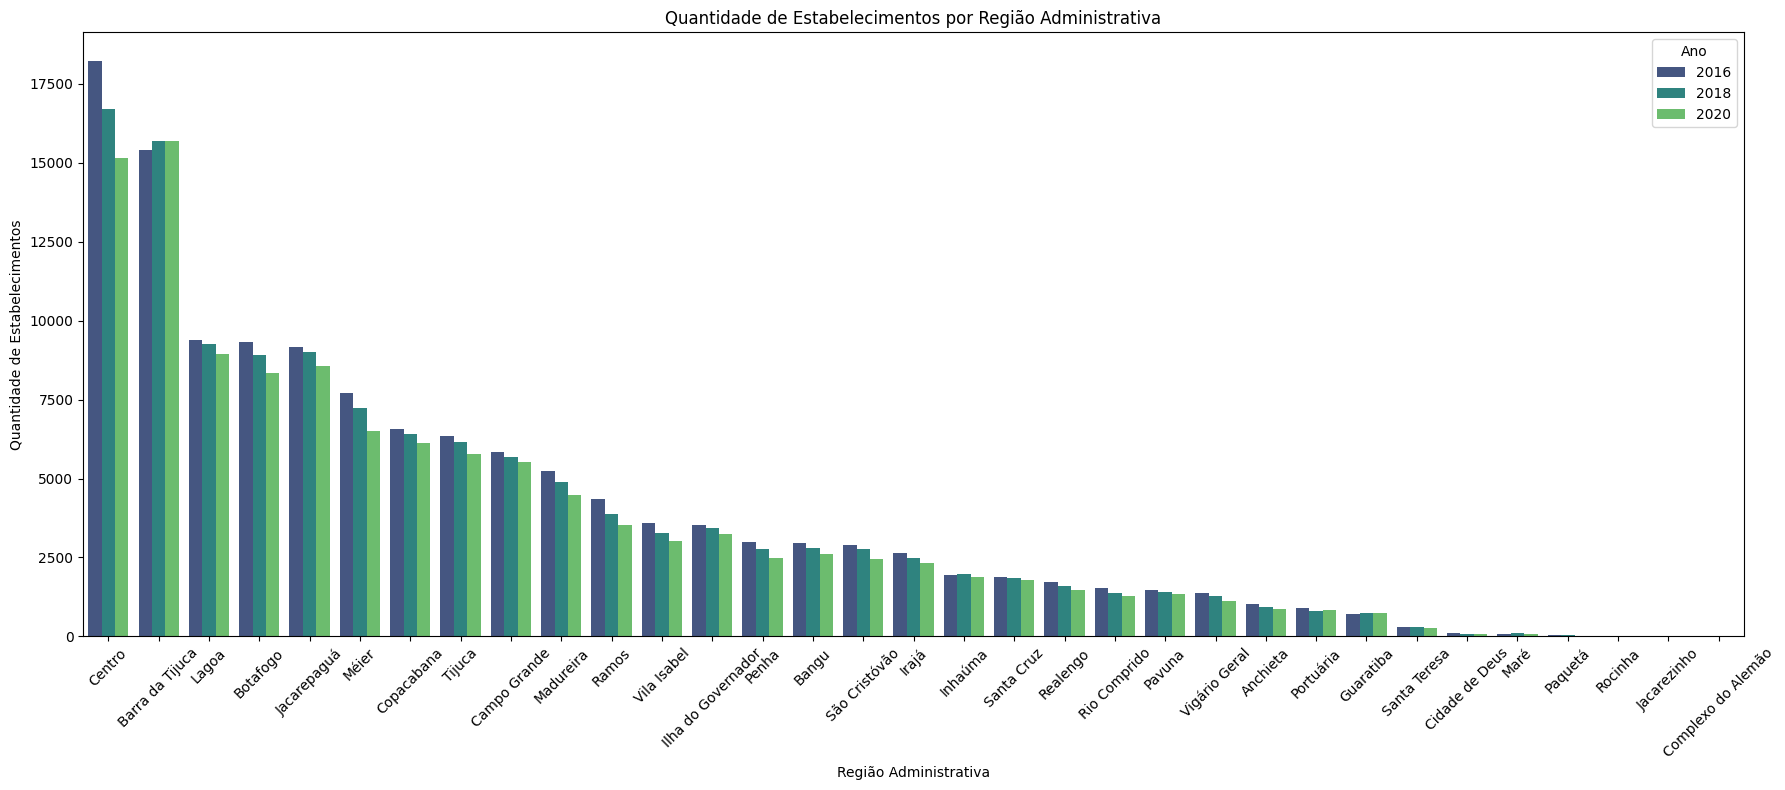

In [27]:
# Criação do gráfico da quantidade de estabelecimentos por RA de forma decrescente
plt.figure(figsize=(18, 8))
sns.barplot(x='RA', y='Estabelecimentos', data=estabelecimentos.sort_values(by='Estabelecimentos', ascending=False), hue='Ano', palette='viridis')
plt.title('Quantidade de Estabelecimentos por Região Administrativa')
plt.xlabel('Região Administrativa')
plt.ylabel('Quantidade de Estabelecimentos')
plt.legend(title='Ano')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Antes de calcular o percentual de crescimento da quantidade de estabelecimentos
# é necessário retirar as regiões administrativas que não possuem dados em ao menos um dos anos
# do intervalo desejado, já que impactará o cálculo da taxa (divisão por 0)
grouped = estabelecimentos.groupby('RA')['Estabelecimentos'].apply(lambda x: (x == 0).any())

# Identificar regiões com pelo menos 1 ano com 0 estabelecimentos
regioes_com_zero = grouped[grouped].index.tolist()

# Filtrar o DataFrame original para excluir as regiões com 0 estabelecimentos em algum ano
df_filtered = estabelecimentos[~estabelecimentos['RA'].isin(regioes_com_zero)]

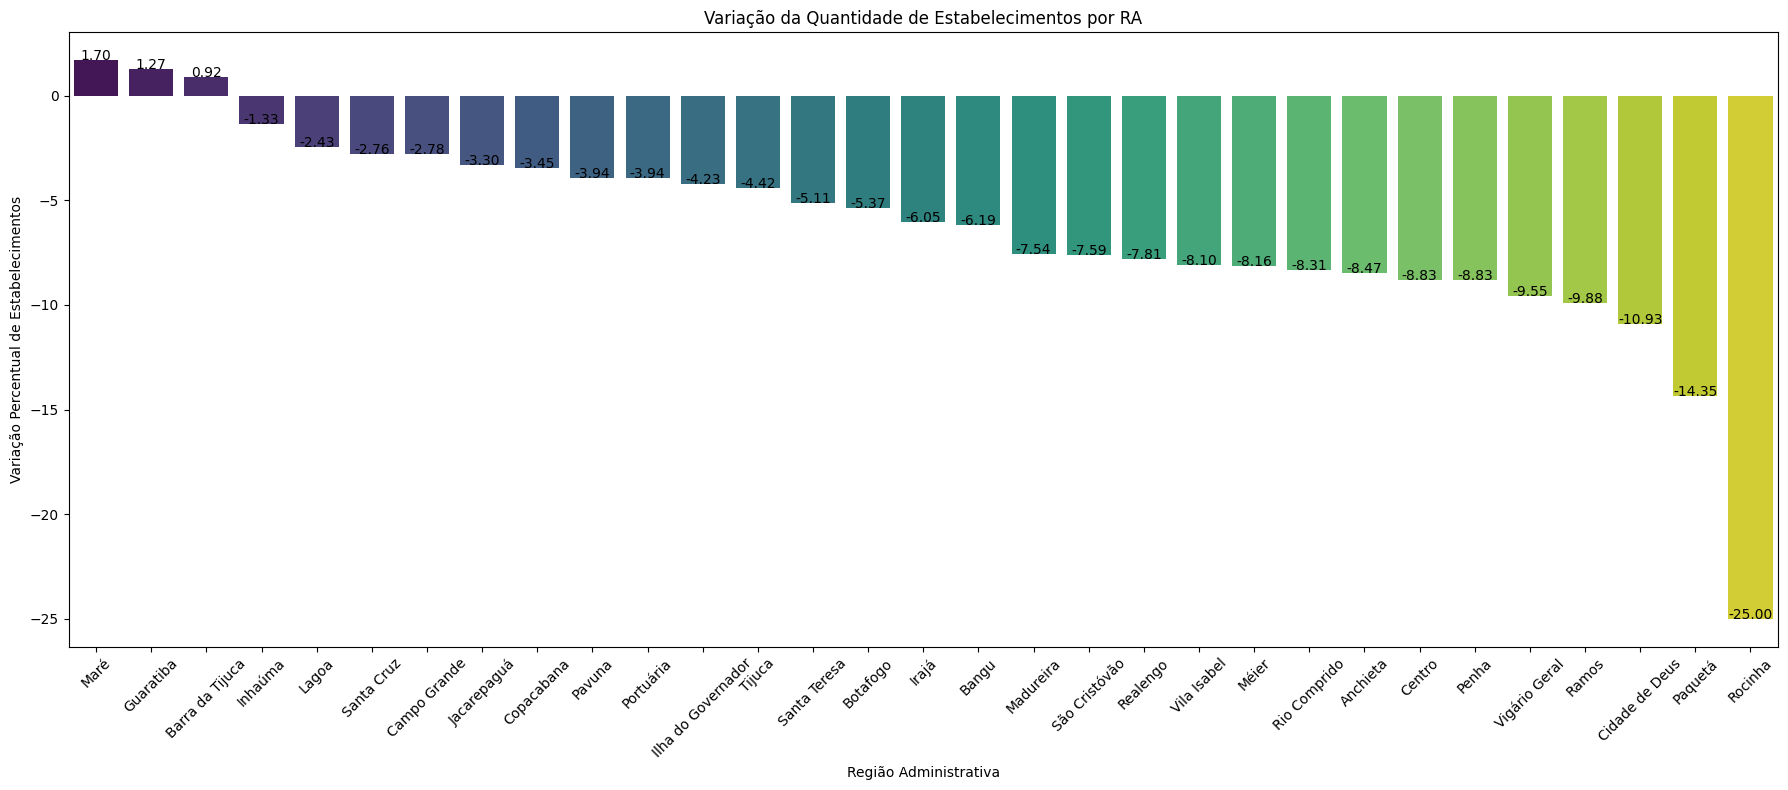

In [28]:
# Criação de um gráfico que represente a variação percentual de estabelecimentos por RA
years_of_interest = [2016, 2018, 2020]
data_filtered = df_filtered[df_filtered['Ano'].isin(years_of_interest)]

# Pivotando a tabela para ter os anos como colunas
data_pivot = data_filtered.pivot(index='RA', columns='Ano', values='Estabelecimentos')

# Calculando a variação percentual entre pares de valores consecutivos para cada RA
data_pivot['variacao'] = ((((data_pivot[2018] - data_pivot[2016]) /
                            data_pivot[2016]) +
                             ((data_pivot[2020] - data_pivot[2018]) /
                              data_pivot[2018])) / 2) * 100

# Ordenando os dados pelo variação calculada
data_sorted = data_pivot.sort_values(by='variacao', ascending=False)

# Configuração do gráfico desejado com base nos cálculos feitos
plt.figure(figsize=(18, 8))

ax = sns.barplot (data=data_sorted, x=data_sorted.index, y='variacao', palette='viridis')

plt.xlabel('Região Administrativa')
plt.ylabel('Variação Percentual de Estabelecimentos')
plt.title('Variação da Quantidade de Estabelecimentos por RA')
plt.xticks(rotation=45)

# Inserção dos dados de varição acima de cada barra para melhor visualização
for i, value in enumerate(data_sorted['variacao']):
  plt.text(i, value, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()